# AAI 521 Final Project EDA
University of San Diego - Ethan Schmitt

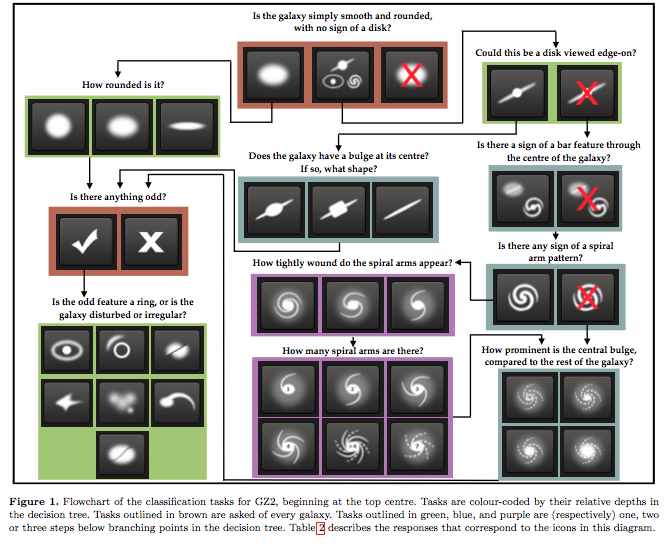

In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [15]:
IMAGES = Path("data/unzipped/images_training_rev1")
data = pd.read_csv("data/unzipped/training_solutions_rev1.csv")

In [16]:
data.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GalaxyID   61578 non-null  int64  
 1   Class1.1   61578 non-null  float64
 2   Class1.2   61578 non-null  float64
 3   Class1.3   61578 non-null  float64
 4   Class2.1   61578 non-null  float64
 5   Class2.2   61578 non-null  float64
 6   Class3.1   61578 non-null  float64
 7   Class3.2   61578 non-null  float64
 8   Class4.1   61578 non-null  float64
 9   Class4.2   61578 non-null  float64
 10  Class5.1   61578 non-null  float64
 11  Class5.2   61578 non-null  float64
 12  Class5.3   61578 non-null  float64
 13  Class5.4   61578 non-null  float64
 14  Class6.1   61578 non-null  float64
 15  Class6.2   61578 non-null  float64
 16  Class7.1   61578 non-null  float64
 17  Class7.2   61578 non-null  float64
 18  Class7.3   61578 non-null  float64
 19  Class8.1   61578 non-null  float64
 20  Class8

In [18]:
print(data.drop("GalaxyID", axis=1).select_dtypes(include="number").mean().sort_values(ascending=False))

Class6.2     0.768193
Class1.2     0.542261
Class2.2     0.435854
Class1.1     0.432526
Class3.2     0.333328
Class6.1     0.231807
Class4.2     0.220224
Class4.1     0.215629
Class7.2     0.207765
Class5.2     0.180468
Class5.3     0.177904
Class7.1     0.170021
Class2.1     0.106408
Class3.1     0.102526
Class11.2    0.094338
Class10.1    0.091801
Class10.2    0.083969
Class11.6    0.073683
Class8.5     0.064546
Class9.1     0.063014
Class7.3     0.054740
Class8.6     0.042307
Class5.1     0.040842
Class8.4     0.040044
Class10.3    0.039859
Class5.4     0.036639
Class8.1     0.034812
Class8.3     0.032807
Class9.3     0.032780
Class1.3     0.025213
Class11.3    0.017587
Class11.1    0.015411
Class8.2     0.013449
Class9.2     0.010614
Class11.4    0.007603
Class11.5    0.007006
Class8.7     0.003842
dtype: float64


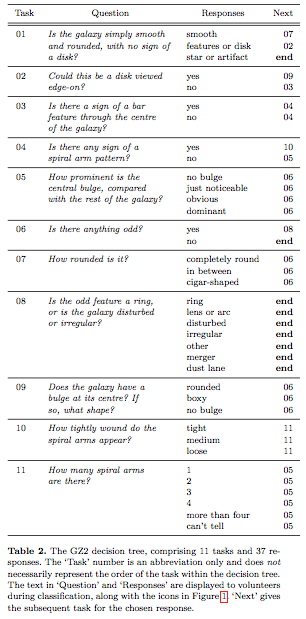

In [19]:
# Break up data by class to confirm statistics
class1 = (data[["Class1.1", "Class1.2", "Class1.3"]].sum(axis=1)).describe()
print(f"Class 1:\n{class1}\n")


Class 1:
count    6.157800e+04
mean     1.000000e+00
std      4.085684e-07
min      9.999990e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000001e+00
dtype: float64



In [20]:
class_matrix = np.array(
    [
        # 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,E
        [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],  # 1
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # 2
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],  # 3
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],  # 4
        [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],  # 5
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],  # 6
        [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],  # 7
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7],  # 8
        [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],  # 9
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],  # 10
        [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0],  # 11
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # E
    ]
)


# All classes must derive from one of the classes at the top of the tree (i.e. Class1.x)
def count_classes(task=-1):
    if task == 0:
        return 1

    count = 0
    for i in range(0, 12):
        if class_matrix[i, task] == 0:
            continue

        count += class_matrix[i, task] * count_classes(i)

    return count


print(f"Number of possible unique classifications: {count_classes()}\n")

Number of possible unique classifications: 1265



In [30]:
# Class mapping
# 1
def classify(x):
    columns = ["Class1.1", "Class1.2", "Class1.3"]
    classification = np.argmax(x[columns])
    types = ["Smooth", "Non-Smooth", "Not Galaxy"]

    if classification == 0:
        return ", ".join((types[classification], roundness(x)))
    elif classification == 1:
        return ", ".join((types[classification], viewing_angle(x)))
    elif classification == 2:
        return types[classification]


# 2
def viewing_angle(x):
    columns = ["Class2.1", "Class2.2"]
    classification = np.argmax(x[columns])
    types = ["Edge On", "Face On"]

    if classification == 0:
        return ", ".join((types[classification], galactic_bulge(x)))
    elif classification == 1:
        return ", ".join((types[classification], galactic_bar(x)))


# 3
def galactic_bar(x):
    columns = ["Class3.1", "Class3.2"]
    classification = np.argmax(x[columns])
    types = ["Visible Galactic Bar, ", ""]

    return types[classification] + galactic_spiral(x)


# 4/10/11
def galactic_spiral(x):
    general_spiral = ["Class4.1", "Class4.2"]
    general_classification = np.argmax(x[general_spiral])

    if general_classification == 1:
        return central_bulge(x)

    spiral_type = ["Class10.1", "Class10.2", "Class10.3"]
    type_classification = np.argmax(x[spiral_type])

    spiral_num = ["Class11.1", "Class11.2", "Class11.3", "Class11.4", "Class11.5", "Class11.6"]
    number_classification = np.argmax(x[spiral_num])

    spiral_types = ["Tight", "Medium", "Loose"]
    spiral_number = ["[1 Rings],", "[2 Rings],", "[3 Rings],", "[4 Rings],", "[>4 Rings],", "[? Rings],"]

    return " ".join(
        (
            spiral_types[type_classification],
            "Spiral",
            spiral_number[number_classification],
            central_bulge(x),
        )
    )


# 5
def central_bulge(x):
    columns = ["Class5.1", "Class5.2", "Class5.3", "Class5.4"]
    classification = np.argmax(x[columns])
    types = ["", "Faint Central Bulge", "Prominent Central Bulge", "Dominant Central Bulge"]

    return ", ".join((types[classification], anomalous(x)))


# 9
def galactic_bulge(x):
    columns = ["Class9.1", "Class9.2", "Class9.3"]
    classification = np.argmax(x[columns])
    types = ["Rounded Galatic Bulge, ", "Boxy Galatic Bulge, ", "Galatic Bulge, ", ""]

    return types[classification] + anomalous(x)


# 7
def roundness(x):
    columns = ["Class7.1", "Class7.2", "Class7.3"]
    classification = np.argmax(x[columns])
    types = ["Completely Round", "Somewhat Round", "Cigar Shaped"]

    return ", ".join((types[classification], anomalous(x)))


# 6/8
def anomalous(x):
    columns = ["Class6.1", "Class6.2"]
    classification = np.argmax(x[columns])
    if classification == 1:
        return "(Non-Anomalous)"

    columns = ["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]
    classification = np.argmax(x[columns])
    types = ["(Ring", "(Lens or Arc", "(Disturbed", "(Irregular", "(Other", "(Merger", "(Dust Lane"]

    return " ".join((types[classification], "Anomaly)"))


In [22]:
classify(data.iloc[0])

'Non-Smooth, Face On, Tight Spiral [? Rings] , Prominent Central Bulge, (Non-Anomalous)'

In [23]:
# Evaluate classify on each row of data
data["Classification"] = data.apply(classify, axis=1)

In [24]:
print(f"Number of unique classifications present in data: {len(data['Classification'].unique())}")

Number of unique classifications present in data: 505


In [28]:
def display_images(image_data: list[int], figsize: tuple[int, int] = (25, 25), fontsize: int = 7):
    image_id = image_data["GalaxyID"]
    num_images = len(image_id)
    axis_size = int(np.ceil(np.sqrt(num_images)))

    plt.figure(figsize=figsize)
    for i in range(num_images):
        image = plt.imread(IMAGES / f"{image_id[i]}.jpg")
        _class = classify(image_data.iloc[i])

        plt.subplot(axis_size, axis_size, i + 1)
        plt.title(f"{image_id[i]} Class:\n {_class}", fontsize=fontsize)
        plt.imshow(image)
        plt.axis("off")
    plt.show()


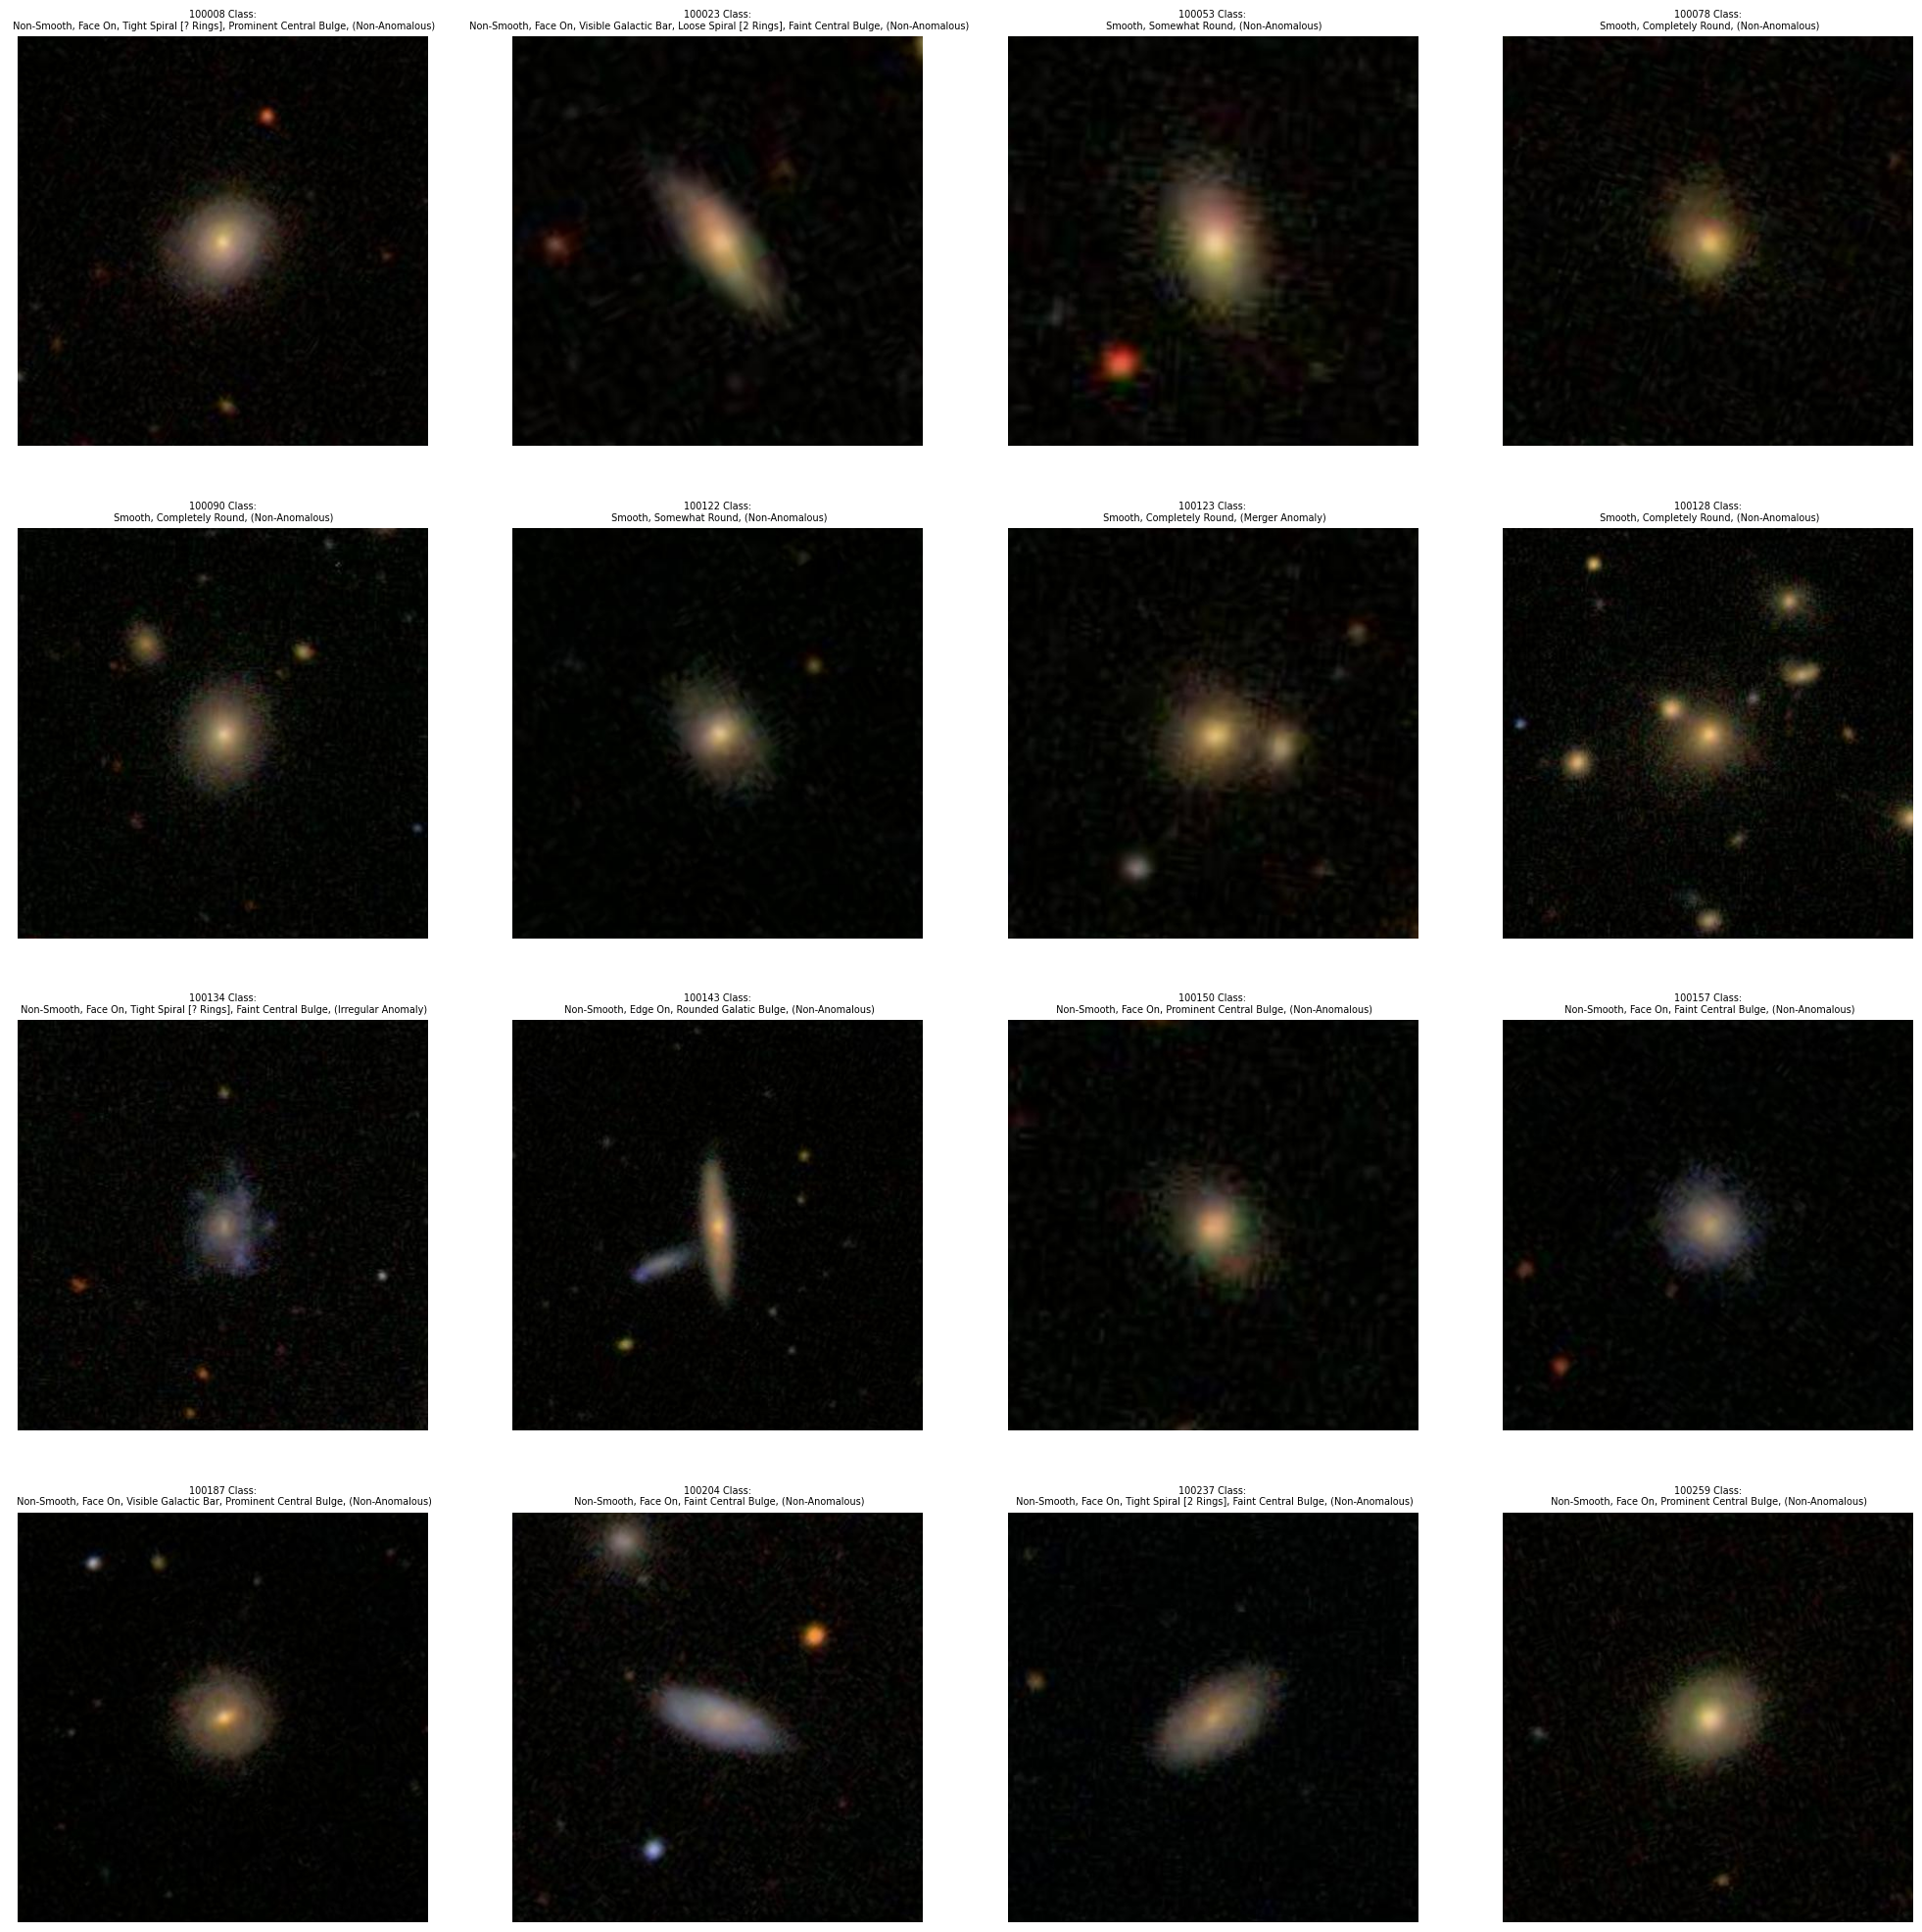

In [31]:
display_images(data[0:16])